In [1]:
import numpy as np
import pandas as pd
import pathlib
import time
import matplotlib.pyplot as plt

In [2]:
# Set path
path = pathlib.Path(r"C:\Users\Mathiass\OneDrive - Universität Zürich UZH\Documents\mt_literature")

In [3]:
# read dataset
data = pd.read_parquet(path/"final_df_filledmean_small.parquet")

In [4]:
# # # create smaller dataset to parquet
# X_1 = data.iloc[:, :19]
# X_2 = data[["cp_flag_C", "cp_flag_P"]]
# y = data["option_ret"]
# test = pd.concat([X_1, X_2, y], axis=1)
# test.to_parquet(fr"{path}\final_df_filledmean_small.parquet")

In [5]:
# FEATURE ENGINEERING
# Bid-Ask-Spread
data["best_bid"] = (data["best_offer"] - data["best_bid"]) / (data["best_offer"])
data = data.rename(columns={"best_bid": "ba_spread_option"}).drop(["best_offer"], axis=1)

# Gamma -> multiply by spotprice and divide by 100
data["gamma"] = data["gamma"] * data["spotprice"] / 100 #following Bali et al. (2021)

# Theta -> scale by spotprice
data["theta"] = data["theta"] / data["spotprice"] #following Bali et al. (2021)

# Vega -> scale by spotprice
data["vega"] = data["vega"] / data["spotprice"] #following Bali et al. (2021)

# Time to Maturity -> scale by number of days in year -> 365
data["days_to_exp"] = data["days_to_exp"] / 365

# Moneyness
data["strike_price"] = data["strike_price"] / data["spotprice"] # K / S
data = data.rename(columns={"strike_price": "moneyness"})

# Forward Price ratio
data["forwardprice"] = data["forwardprice"] / data["spotprice"]

# drop cf_adj + days no trading
data = data.drop(["cfadj", "days_no_trading", "spotprice", "adj_spot"], axis=1)


In [6]:
data.describe()

,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
count,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06
mean,1.005707e+00,1.237750e-01,8.287707e+01,1.758138e+03,3.903387e-01,1.159274e-01,1.966391e-02,1.673342e-01,-1.191844e-01,3.444928e-01,1.001253e+00,1.801164e-02,1.074541e+01,5.696684e-01,4.303316e-01,7.071203e-02
std,2.517593e-01,1.456705e-01,5.716747e+02,5.857606e+03,2.045789e-01,4.807332e-01,1.375282e-02,8.133505e-02,8.748857e-02,2.271733e-01,1.211339e-02,1.915535e-02,3.902749e+01,4.951226e-01,4.951226e-01,4.628415e+01
min,4.661896e-03,7.407407e-04,1.000000e+00,1.000000e+00,1.114700e-02,-9.996790e-01,0.000000e+00,1.770231e-06,-3.848867e+00,7.671233e-02,1.010918e-06,8.914000e-04,4.000000e-02,0.000000e+00,0.000000e+00,-1.601024e+04
25%,8.990601e-01,3.793103e-02,3.000000e+00,6.800000e+01,2.594750e-01,-2.718088e-01,1.017074e-02,1.097347e-01,-1.505543e-01,1.369863e-01,9.965854e-01,2.672931e-03,1.250000e+00,0.000000e+00,0.000000e+00,-3.809086e-02
50%,9.951052e-01,7.142857e-02,1.100000e+01,3.160000e+02,3.396540e-01,1.604595e-01,1.661431e-02,1.491073e-01,-9.790598e-02,2.986301e-01,1.000660e+00,1.074308e-02,3.050000e+00,1.000000e+00,0.000000e+00,-1.026846e-02
75%,1.086345e+00,1.433962e-01,4.000000e+01,1.264000e+03,4.579990e-01,5.068760e-01,2.566971e-02,2.263910e-01,-6.278159e-02,4.739726e-01,1.005087e+00,2.571517e-02,7.650000e+00,1.000000e+00,1.000000e+00,1.373179e-02
max,6.666667e+01,9.966667e-01,2.561690e+05,7.795400e+05,2.998749e+00,1.000030e+00,6.688436e-01,3.946753e-01,1.438336e-01,9.835616e-01,1.067028e+00,7.199510e-02,2.700250e+03,1.000000e+00,1.000000e+00,7.425289e+04


In [7]:
# # multiclass y label function
# def binary_categorize(x):
#     if x > 0:
#         return 1
#     else:
#         return 0

# # apply label function to option returns
# data["option_ret"] = data["option_ret"].apply(binary_categorize)

# data[data["cp_flag_C"] == 0]["option_ret"].plot(kind="hist")

# data[data["cp_flag_C"] == 1]["option_ret"].plot(kind="hist")

# data["option_ret"].plot(kind="hist")

# def percent_one(x):
#     return np.sum(x) / len(x)

# percent_one(data[data["cp_flag_C"] == 1]["option_ret"])

# percent_one(data[data["cp_flag_P"] == 1]["option_ret"])

In [8]:
# drop large outlier

# to_drop = []


# to_drop += (list(np.where(data["moneyness"] > np.percentile(data["moneyness"], 99))[0]))
# to_drop += (list(np.where(data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99))[0]))
# to_drop += (list(np.where(data["volume"] > np.percentile(data["volume"], 99))[0]))
# to_drop += (list(np.where(data["open_interest"] > np.percentile(data["open_interest"], 99))[0]))

# data = data.drop(set(to_drop)).reset_index(drop=True)

In [9]:
data

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
0,1996-01-31,0.833333,0.075000,15,25,0.380062,0.793831,0.010726,0.185697,-0.108481,0.468493,1.005945,0.052253,4.81250,1.0,0.0,-0.025367
1,1996-01-31,1.041667,0.115385,16,403,0.294709,0.462826,0.019507,0.266727,-0.105569,0.468493,1.005945,0.052253,1.53125,1.0,0.0,-0.003343
2,1996-01-31,1.145833,0.210526,1,55,0.343211,0.324547,0.015217,0.242985,-0.104274,0.468493,1.005945,0.052253,1.06250,1.0,0.0,-0.049677
3,1996-01-31,1.041667,0.121212,10,49,0.307167,-0.591168,0.028856,0.176290,-0.100031,0.219178,1.002422,0.053710,1.93750,0.0,1.0,-0.012452
4,1996-01-31,0.937500,0.272727,1,11,0.281269,-0.285548,0.026399,0.156785,-0.087753,0.219178,1.002422,0.053710,0.59375,0.0,1.0,-0.032655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823381,2021-11-30,1.056052,0.233333,134,665,0.437066,0.487561,0.011790,0.309759,-0.113684,0.621918,0.983934,0.002822,1.32500,1.0,0.0,-0.068384
3823382,2021-11-30,1.218522,0.866667,5,14,0.335686,0.249430,0.012111,0.249077,-0.068846,0.621918,0.983934,0.002822,0.42500,1.0,0.0,0.055073
3823383,2021-11-30,0.893582,0.818182,3,111,0.308935,-0.297605,0.014085,0.270417,-0.066227,0.621918,0.983934,0.002822,0.65000,0.0,1.0,0.020419
3823384,2021-11-30,0.974817,0.312500,53,35,0.372075,-0.422035,0.013153,0.304181,-0.089546,0.621918,0.983934,0.002822,1.35000,0.0,1.0,-0.016824


In [10]:
from sklearn.model_selection import TimeSeriesSplit

In [11]:
tscv = TimeSeriesSplit(n_splits=17)

In [12]:
for train, test in tscv.split(data):
    print("%s %s" % (train, test))

[     0      1      2 ... 212413 212414 212415] [212416 212417 212418 ... 424823 424824 424825]
[     0      1      2 ... 424823 424824 424825] [424826 424827 424828 ... 637233 637234 637235]
[     0      1      2 ... 637233 637234 637235] [637236 637237 637238 ... 849643 849644 849645]
[     0      1      2 ... 849643 849644 849645] [ 849646  849647  849648 ... 1062053 1062054 1062055]
[      0       1       2 ... 1062053 1062054 1062055] [1062056 1062057 1062058 ... 1274463 1274464 1274465]
[      0       1       2 ... 1274463 1274464 1274465] [1274466 1274467 1274468 ... 1486873 1486874 1486875]
[      0       1       2 ... 1486873 1486874 1486875] [1486876 1486877 1486878 ... 1699283 1699284 1699285]
[      0       1       2 ... 1699283 1699284 1699285] [1699286 1699287 1699288 ... 1911693 1911694 1911695]
[      0       1       2 ... 1911693 1911694 1911695] [1911696 1911697 1911698 ... 2124103 2124104 2124105]
[      0       1       2 ... 2124103 2124104 2124105] [2124106 2124107

In [13]:
data[:212415]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
0,1996-01-31,0.833333,0.075000,15,25,0.380062,0.793831,0.010726,0.185697,-0.108481,0.468493,1.005945,0.052253,4.81250,1.0,0.0,-0.025367
1,1996-01-31,1.041667,0.115385,16,403,0.294709,0.462826,0.019507,0.266727,-0.105569,0.468493,1.005945,0.052253,1.53125,1.0,0.0,-0.003343
2,1996-01-31,1.145833,0.210526,1,55,0.343211,0.324547,0.015217,0.242985,-0.104274,0.468493,1.005945,0.052253,1.06250,1.0,0.0,-0.049677
3,1996-01-31,1.041667,0.121212,10,49,0.307167,-0.591168,0.028856,0.176290,-0.100031,0.219178,1.002422,0.053710,1.93750,0.0,1.0,-0.012452
4,1996-01-31,0.937500,0.272727,1,11,0.281269,-0.285548,0.026399,0.156785,-0.087753,0.219178,1.002422,0.053710,0.59375,0.0,1.0,-0.032655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212410,1999-10-31,0.891720,0.046512,329,6534,0.435772,-0.244180,0.015180,0.150189,-0.127574,0.232877,1.010338,0.059645,2.62500,0.0,1.0,-0.066044
212411,1999-10-31,0.764331,0.081081,22,539,0.467198,-0.146687,0.007173,0.158223,-0.067911,0.482192,1.021747,0.059245,2.21875,0.0,1.0,-0.069381
212412,1999-10-31,0.828025,0.037037,226,4905,0.469059,-0.160795,0.010919,0.116687,-0.109272,0.232877,1.010338,0.059645,1.65625,0.0,1.0,-0.083374
212413,1999-10-31,1.273885,0.058824,133,6016,0.412561,0.141393,0.011310,0.107406,-0.103909,0.232877,1.010338,0.059645,1.03125,1.0,0.0,-0.078127


In [14]:
# # DROP MONEYNESS BELOW 0.8 AND ABOVE 1.2
# to_drop = []


# to_drop += (list(np.where((data["moneyness"] > 1.2) | (data["moneyness"] < 0.8))[0]))
# data = data.drop(set(to_drop)).reset_index(drop=True)

In [15]:
# # take log of features where distribution is skewed
# # data["moneyness"] = np.log(data["moneyness"])
# data["ba_spread_option"] = np.log(data["ba_spread_option"])
# data["volume"] = np.log(data["volume"])
# data["open_interest"] = np.log(data["open_interest"])
# data["impl_volatility"] = np.log(data["impl_volatility"])
# # data["days_to_exp"] = np.log(data["days_to_exp"])
# data["mid_price"] = np.log(data["mid_price"])

# # data["forwardprice"] = np.log(data["forwardprice"])
# # data["ir_rate"] = np.log(data["ir_rate"])

In [16]:
data

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
0,1996-01-31,0.833333,0.075000,15,25,0.380062,0.793831,0.010726,0.185697,-0.108481,0.468493,1.005945,0.052253,4.81250,1.0,0.0,-0.025367
1,1996-01-31,1.041667,0.115385,16,403,0.294709,0.462826,0.019507,0.266727,-0.105569,0.468493,1.005945,0.052253,1.53125,1.0,0.0,-0.003343
2,1996-01-31,1.145833,0.210526,1,55,0.343211,0.324547,0.015217,0.242985,-0.104274,0.468493,1.005945,0.052253,1.06250,1.0,0.0,-0.049677
3,1996-01-31,1.041667,0.121212,10,49,0.307167,-0.591168,0.028856,0.176290,-0.100031,0.219178,1.002422,0.053710,1.93750,0.0,1.0,-0.012452
4,1996-01-31,0.937500,0.272727,1,11,0.281269,-0.285548,0.026399,0.156785,-0.087753,0.219178,1.002422,0.053710,0.59375,0.0,1.0,-0.032655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823381,2021-11-30,1.056052,0.233333,134,665,0.437066,0.487561,0.011790,0.309759,-0.113684,0.621918,0.983934,0.002822,1.32500,1.0,0.0,-0.068384
3823382,2021-11-30,1.218522,0.866667,5,14,0.335686,0.249430,0.012111,0.249077,-0.068846,0.621918,0.983934,0.002822,0.42500,1.0,0.0,0.055073
3823383,2021-11-30,0.893582,0.818182,3,111,0.308935,-0.297605,0.014085,0.270417,-0.066227,0.621918,0.983934,0.002822,0.65000,0.0,1.0,0.020419
3823384,2021-11-30,0.974817,0.312500,53,35,0.372075,-0.422035,0.013153,0.304181,-0.089546,0.621918,0.983934,0.002822,1.35000,0.0,1.0,-0.016824


In [17]:
np.where(data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99))[0]

array([   1271,    2427,    3776, ..., 3823372, 3823382, 3823383],
      dtype=int64)

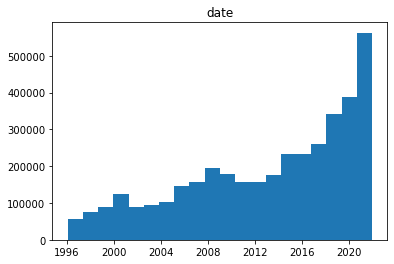

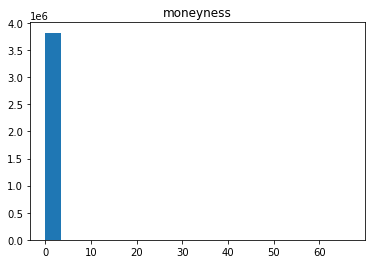

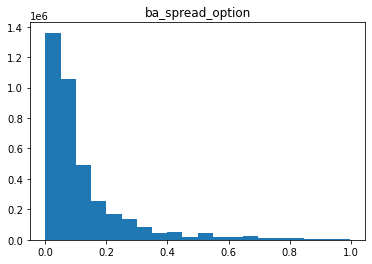

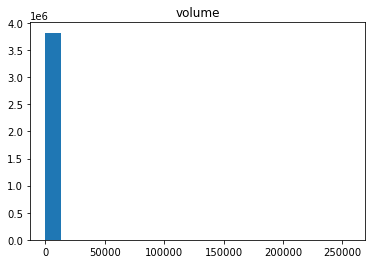

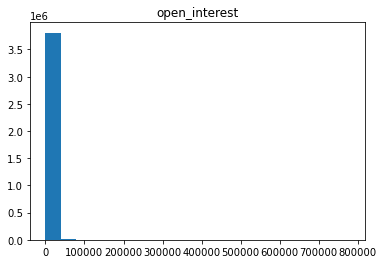

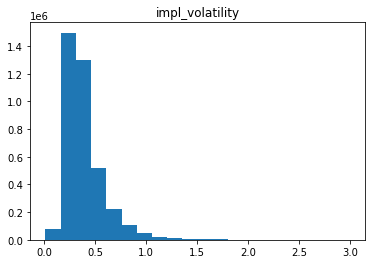

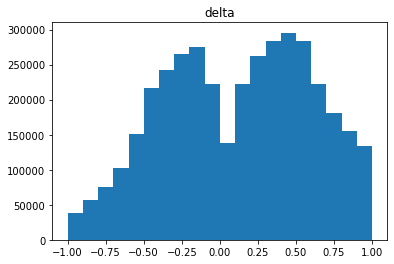

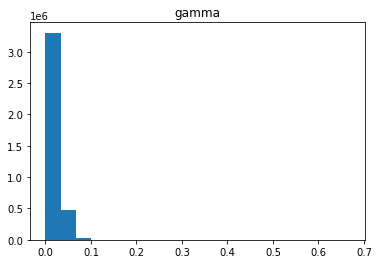

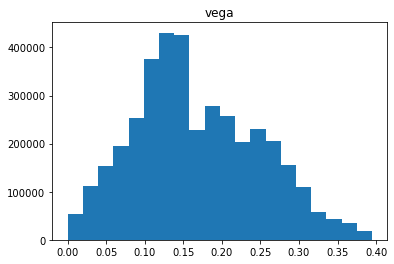

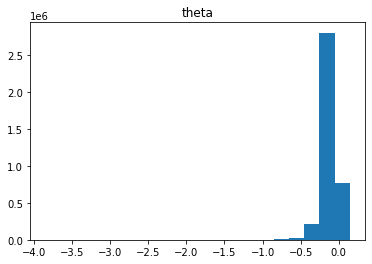

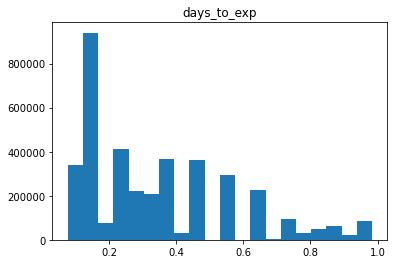

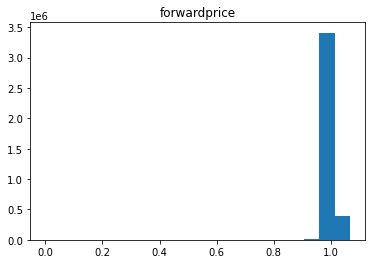

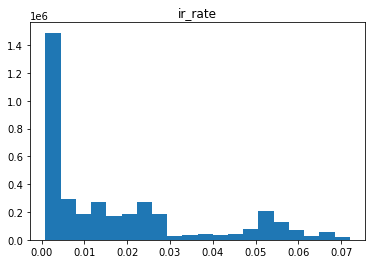

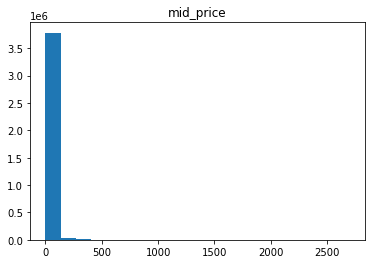

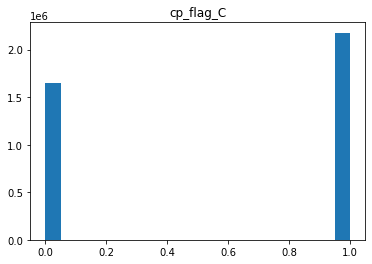

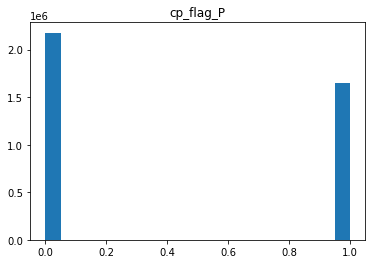

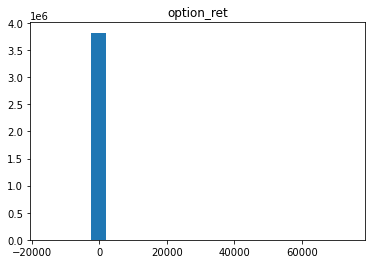

In [18]:
# Plot each column
for i in data.columns:
    plt.figure()
    plt.hist(data[i], bins=20)
    plt.title(i)

<AxesSubplot:ylabel='Frequency'>

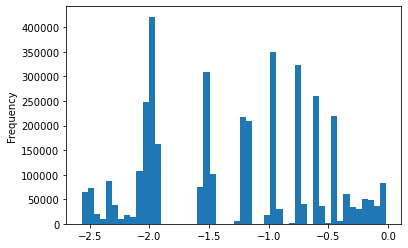

In [19]:
np.log(data["days_to_exp"]).plot(kind="hist", bins=50)

In [20]:
data.drop(np.where(data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99))[0])

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
0,1996-01-31,0.833333,0.075000,15,25,0.380062,0.793831,0.010726,0.185697,-0.108481,0.468493,1.005945,0.052253,4.81250,1.0,0.0,-0.025367
1,1996-01-31,1.041667,0.115385,16,403,0.294709,0.462826,0.019507,0.266727,-0.105569,0.468493,1.005945,0.052253,1.53125,1.0,0.0,-0.003343
2,1996-01-31,1.145833,0.210526,1,55,0.343211,0.324547,0.015217,0.242985,-0.104274,0.468493,1.005945,0.052253,1.06250,1.0,0.0,-0.049677
3,1996-01-31,1.041667,0.121212,10,49,0.307167,-0.591168,0.028856,0.176290,-0.100031,0.219178,1.002422,0.053710,1.93750,0.0,1.0,-0.012452
4,1996-01-31,0.937500,0.272727,1,11,0.281269,-0.285548,0.026399,0.156785,-0.087753,0.219178,1.002422,0.053710,0.59375,0.0,1.0,-0.032655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823379,2021-11-30,1.137287,0.208333,11,1010,0.319779,-0.721863,0.016942,0.199791,-0.084682,0.369863,0.991859,0.002168,2.15000,0.0,1.0,0.009575
3823380,2021-11-30,0.974817,0.257143,5,1,0.381848,0.577532,0.013551,0.301742,-0.100071,0.621918,0.983934,0.002822,1.52500,1.0,0.0,0.012608
3823381,2021-11-30,1.056052,0.233333,134,665,0.437066,0.487561,0.011790,0.309759,-0.113684,0.621918,0.983934,0.002822,1.32500,1.0,0.0,-0.068384
3823384,2021-11-30,0.974817,0.312500,53,35,0.372075,-0.422035,0.013153,0.304181,-0.089546,0.621918,0.983934,0.002822,1.35000,0.0,1.0,-0.016824


In [21]:
data

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
0,1996-01-31,0.833333,0.075000,15,25,0.380062,0.793831,0.010726,0.185697,-0.108481,0.468493,1.005945,0.052253,4.81250,1.0,0.0,-0.025367
1,1996-01-31,1.041667,0.115385,16,403,0.294709,0.462826,0.019507,0.266727,-0.105569,0.468493,1.005945,0.052253,1.53125,1.0,0.0,-0.003343
2,1996-01-31,1.145833,0.210526,1,55,0.343211,0.324547,0.015217,0.242985,-0.104274,0.468493,1.005945,0.052253,1.06250,1.0,0.0,-0.049677
3,1996-01-31,1.041667,0.121212,10,49,0.307167,-0.591168,0.028856,0.176290,-0.100031,0.219178,1.002422,0.053710,1.93750,0.0,1.0,-0.012452
4,1996-01-31,0.937500,0.272727,1,11,0.281269,-0.285548,0.026399,0.156785,-0.087753,0.219178,1.002422,0.053710,0.59375,0.0,1.0,-0.032655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823381,2021-11-30,1.056052,0.233333,134,665,0.437066,0.487561,0.011790,0.309759,-0.113684,0.621918,0.983934,0.002822,1.32500,1.0,0.0,-0.068384
3823382,2021-11-30,1.218522,0.866667,5,14,0.335686,0.249430,0.012111,0.249077,-0.068846,0.621918,0.983934,0.002822,0.42500,1.0,0.0,0.055073
3823383,2021-11-30,0.893582,0.818182,3,111,0.308935,-0.297605,0.014085,0.270417,-0.066227,0.621918,0.983934,0.002822,0.65000,0.0,1.0,0.020419
3823384,2021-11-30,0.974817,0.312500,53,35,0.372075,-0.422035,0.013153,0.304181,-0.089546,0.621918,0.983934,0.002822,1.35000,0.0,1.0,-0.016824


In [22]:
# take out outliers
np.where(data["moneyness"] > np.percentile(data["moneyness"], 99))[0]

array([    377,     675,     676, ..., 3822999, 3823000, 3823001],
      dtype=int64)

In [23]:
# drop outliers
data[data["open_interest"] > np.percentile(data["open_interest"], 99)]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
20951,1996-07-31,1.057269,0.111111,4151,28072,0.359720,0.462076,0.016299,0.265563,-0.128190,0.468493,1.002526,0.058726,2.12500,1.0,0.0,-0.052224
24106,1996-08-31,1.025641,0.062500,49,28023,0.317589,0.485855,0.020523,0.241966,-0.128042,0.386301,0.998361,0.058506,1.93750,1.0,0.0,-0.009291
26788,1996-09-30,1.048035,0.153846,261,29099,0.322309,0.445252,0.023043,0.213756,-0.142115,0.301370,1.004759,0.057100,1.50000,1.0,0.0,0.042885
29202,1996-09-30,1.061947,0.052632,901,25053,0.279222,0.406446,0.025338,0.211376,-0.119641,0.301370,1.013055,0.057100,1.15625,1.0,0.0,-0.025017
32554,1996-10-31,1.012658,0.083333,133,26876,0.276069,0.509020,0.031118,0.183634,-0.144103,0.216438,1.007985,0.055420,1.43750,1.0,0.0,-0.040215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821034,2021-11-30,1.130582,0.055738,533,51711,0.546654,-0.688172,0.017152,0.133482,-0.254787,0.142466,1.000248,0.001739,2.96500,0.0,1.0,-0.037268
3821035,2021-11-30,0.452233,0.875000,2,123151,1.073917,-0.015319,0.000953,0.014551,-0.054923,0.142466,1.000248,0.001739,0.04500,0.0,1.0,-0.081849
3821043,2021-11-30,1.243640,0.133333,7963,37721,0.549772,0.236821,0.011989,0.144543,-0.181566,0.219178,1.000406,0.001853,0.56000,1.0,0.0,-0.098899
3821114,2021-11-30,0.847937,0.091503,52,35259,0.543669,-0.269458,0.008229,0.243882,-0.120687,0.545205,1.001438,0.002636,1.46000,0.0,1.0,-0.061388


In [24]:
IQA = np.percentile(data["ba_spread_option"], 75) - np.percentile(data["ba_spread_option"], 25)

In [25]:
data[data["ba_spread_option"] > 5 * IQA]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
353,1996-01-31,1.135371,0.666667,175,145,0.324628,0.155862,0.021222,0.082956,-0.119832,0.123288,1.006583,0.054401,0.25000,1.0,0.0,-0.043881
394,1996-01-31,1.058824,0.600000,31,100,0.133461,0.255781,0.047011,0.170352,-0.054949,0.295890,1.002839,0.053274,0.21875,1.0,0.0,0.020035
426,1996-01-31,1.057269,0.571429,8,37,0.220074,0.250458,0.041527,0.110121,-0.113595,0.123288,1.001616,0.054401,0.31250,1.0,0.0,-0.021471
468,1996-01-31,1.186441,0.571429,30,1543,0.560668,0.210269,0.014821,0.099684,-0.243244,0.123288,0.996346,0.054401,0.31250,1.0,0.0,-0.023941
514,1996-01-31,1.157895,0.666667,1,440,0.278676,0.162787,0.018977,0.114307,-0.081869,0.219178,1.010844,0.053710,0.25000,1.0,0.0,0.282872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823372,2021-11-30,1.543461,0.833333,5,32,0.519411,0.106458,0.005820,0.111273,-0.078707,0.369863,0.991859,0.002168,0.17500,1.0,0.0,-0.202448
3823373,2021-11-30,1.624695,0.666667,6,348,0.496245,0.068361,0.004369,0.080025,-0.053931,0.369863,0.991859,0.002168,0.10000,1.0,0.0,-0.146186
3823374,2021-11-30,1.705930,0.666667,9,305,0.532621,0.064736,0.003901,0.076828,-0.055462,0.369863,0.991859,0.002168,0.10000,1.0,0.0,-0.185074
3823382,2021-11-30,1.218522,0.866667,5,14,0.335686,0.249430,0.012111,0.249077,-0.068846,0.621918,0.983934,0.002822,0.42500,1.0,0.0,0.055073


In [26]:
np.percentile(data["ba_spread_option"], 99.99)

0.9893617021276596

In [27]:
data[data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99.99)]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
1650131,2013-01-31,0.499122,0.990148,1,1044,0.444418,-0.039184,0.001935,0.082563,-0.018948,0.964384,0.971559,0.003349,1.025,0.0,1.0,-0.102166
1651292,2013-01-31,0.655864,0.994595,1,37,0.321209,-0.020617,0.002276,0.033813,-0.011672,0.465753,1.000244,0.003028,0.930,0.0,1.0,0.179511
1651293,2013-01-31,0.665509,0.994565,1,36,0.311239,-0.021143,0.002400,0.034552,-0.011551,0.465753,1.000244,0.003028,0.925,0.0,1.0,0.231945
1716568,2013-07-31,0.466746,0.993711,1,58,0.517078,-0.009759,0.000739,0.017830,-0.009869,0.468493,0.999364,0.002859,0.800,0.0,1.0,0.011161
1716569,2013-07-31,0.491312,0.992188,1,346,0.470741,-0.008837,0.000745,0.016358,-0.008235,0.468493,0.999364,0.002859,0.645,0.0,1.0,-0.324164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818776,2021-11-30,0.559635,0.990741,4,787,0.803510,-0.019710,0.001579,0.018072,-0.050915,0.142466,0.997729,0.001739,0.545,0.0,1.0,-0.071326
3820157,2021-11-30,1.448561,0.995455,18,2,0.633972,0.043748,0.004533,0.029915,-0.091133,0.104110,1.000151,0.001451,1.105,1.0,0.0,-0.123394
3820158,2021-11-30,1.479381,0.995413,21,3,0.661187,0.041944,0.004202,0.028937,-0.091865,0.104110,1.000151,0.001451,1.095,1.0,0.0,-0.126554
3821036,2021-11-30,0.508762,0.991667,3,482,1.715738,-0.085745,0.002419,0.059142,-0.355810,0.142466,1.000248,0.001739,0.605,0.0,1.0,-0.267151


In [28]:
data["theta"].describe()

count    3.823386e+06
mean    -1.191844e-01
std      8.748857e-02
min     -3.848867e+00
25%     -1.505543e-01
50%     -9.790598e-02
75%     -6.278159e-02
max      1.438336e-01
Name: theta, dtype: float64

<AxesSubplot:ylabel='Frequency'>

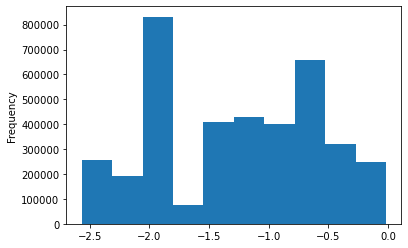

In [29]:
np.log(data["days_to_exp"]).plot(kind="hist")

In [30]:
data["moneyness"].describe()

count    3.823386e+06
mean     1.005707e+00
std      2.517593e-01
min      4.661896e-03
25%      8.990601e-01
50%      9.951052e-01
75%      1.086345e+00
max      6.666667e+01
Name: moneyness, dtype: float64

In [31]:
np.percentile(data["moneyness"], 90)

1.2158489486482622

In [32]:
data[data["moneyness"] > 40]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
1248005,2009-09-30,41.322314,0.004090,52,12,2.824352,-0.962937,0.000773,0.041129,-0.176048,0.295890,1.000940,0.003214,48.80,0.0,1.0,0.004566
1337688,2010-06-30,66.666667,0.020101,10,207,2.408895,-0.985140,0.001240,0.038180,0.075127,0.564384,1.003673,0.006530,9.85,0.0,1.0,1.618684
1337689,2010-06-30,50.000000,0.026846,4,242,2.217801,-0.987646,0.001113,0.032133,0.052393,0.564384,1.003673,0.006530,7.35,0.0,1.0,1.622316


In [33]:
data.describe()

,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
count,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06,3.823386e+06
mean,1.005707e+00,1.237750e-01,8.287707e+01,1.758138e+03,3.903387e-01,1.159274e-01,1.966391e-02,1.673342e-01,-1.191844e-01,3.444928e-01,1.001253e+00,1.801164e-02,1.074541e+01,5.696684e-01,4.303316e-01,7.071203e-02
std,2.517593e-01,1.456705e-01,5.716747e+02,5.857606e+03,2.045789e-01,4.807332e-01,1.375282e-02,8.133505e-02,8.748857e-02,2.271733e-01,1.211339e-02,1.915535e-02,3.902749e+01,4.951226e-01,4.951226e-01,4.628415e+01
min,4.661896e-03,7.407407e-04,1.000000e+00,1.000000e+00,1.114700e-02,-9.996790e-01,0.000000e+00,1.770231e-06,-3.848867e+00,7.671233e-02,1.010918e-06,8.914000e-04,4.000000e-02,0.000000e+00,0.000000e+00,-1.601024e+04
25%,8.990601e-01,3.793103e-02,3.000000e+00,6.800000e+01,2.594750e-01,-2.718088e-01,1.017074e-02,1.097347e-01,-1.505543e-01,1.369863e-01,9.965854e-01,2.672931e-03,1.250000e+00,0.000000e+00,0.000000e+00,-3.809086e-02
50%,9.951052e-01,7.142857e-02,1.100000e+01,3.160000e+02,3.396540e-01,1.604595e-01,1.661431e-02,1.491073e-01,-9.790598e-02,2.986301e-01,1.000660e+00,1.074308e-02,3.050000e+00,1.000000e+00,0.000000e+00,-1.026846e-02
75%,1.086345e+00,1.433962e-01,4.000000e+01,1.264000e+03,4.579990e-01,5.068760e-01,2.566971e-02,2.263910e-01,-6.278159e-02,4.739726e-01,1.005087e+00,2.571517e-02,7.650000e+00,1.000000e+00,1.000000e+00,1.373179e-02
max,6.666667e+01,9.966667e-01,2.561690e+05,7.795400e+05,2.998749e+00,1.000030e+00,6.688436e-01,3.946753e-01,1.438336e-01,9.835616e-01,1.067028e+00,7.199510e-02,2.700250e+03,1.000000e+00,1.000000e+00,7.425289e+04


In [34]:
# def standardize(x):
#     return (x - np.mean(x)) / np.std(x)

# # Plot each column
# for i in data.columns[1:]:
#     plt.figure()
#     plt.hist(standardize(data[i]))
#     plt.title(i)

In [35]:
data[(data["option_ret"] > -0.5) & (data["option_ret"] < 2)]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,forwardprice,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret
0,1996-01-31,0.833333,0.075000,15,25,0.380062,0.793831,0.010726,0.185697,-0.108481,0.468493,1.005945,0.052253,4.81250,1.0,0.0,-0.025367
1,1996-01-31,1.041667,0.115385,16,403,0.294709,0.462826,0.019507,0.266727,-0.105569,0.468493,1.005945,0.052253,1.53125,1.0,0.0,-0.003343
2,1996-01-31,1.145833,0.210526,1,55,0.343211,0.324547,0.015217,0.242985,-0.104274,0.468493,1.005945,0.052253,1.06250,1.0,0.0,-0.049677
3,1996-01-31,1.041667,0.121212,10,49,0.307167,-0.591168,0.028856,0.176290,-0.100031,0.219178,1.002422,0.053710,1.93750,0.0,1.0,-0.012452
4,1996-01-31,0.937500,0.272727,1,11,0.281269,-0.285548,0.026399,0.156785,-0.087753,0.219178,1.002422,0.053710,0.59375,0.0,1.0,-0.032655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823381,2021-11-30,1.056052,0.233333,134,665,0.437066,0.487561,0.011790,0.309759,-0.113684,0.621918,0.983934,0.002822,1.32500,1.0,0.0,-0.068384
3823382,2021-11-30,1.218522,0.866667,5,14,0.335686,0.249430,0.012111,0.249077,-0.068846,0.621918,0.983934,0.002822,0.42500,1.0,0.0,0.055073
3823383,2021-11-30,0.893582,0.818182,3,111,0.308935,-0.297605,0.014085,0.270417,-0.066227,0.621918,0.983934,0.002822,0.65000,0.0,1.0,0.020419
3823384,2021-11-30,0.974817,0.312500,53,35,0.372075,-0.422035,0.013153,0.304181,-0.089546,0.621918,0.983934,0.002822,1.35000,0.0,1.0,-0.016824


In [36]:
# -> moved to data prep file
# data = data.drop(["secid", "optionid", "date", "exdate", "sdate", "edate", "permno"], axis=1)
# -> moved to data prep file. sort values by data! (optionally by secid -> but better to shuffle later)
# data = data.sort_values(["date", "secid"]).reset_index(drop=True)

In [37]:
# How many % missing values do we have?
np.sum(np.sum(data.isnull())) / (data.shape[0] * data.shape[1]) * 100

0.0

In [38]:
# takes a few mins
# data.corr()

In [39]:
# create X and y datasets
y = data["option_ret"]
# drop it for X
X = data.drop(["option_ret"], axis=1)

In [40]:
len(y[y > 0])

1393098

In [41]:
1393098 / len(y)

0.36436237408412336

In [42]:
# multiclass y label function
def binary_categorize(y):
    if y > 0:
        return 1
    else:
        return 0

In [43]:
# multiclass y label function
def multi_categorize(y):
    if y > 0.05:
        return 1
    elif y < -0.05:
        return -1
    else:
        return 0

In [44]:
# apply label function to option returns
y = y.apply(multi_categorize)

In [45]:
# from sklearn.model_selection import train_test_split

In [46]:
np.min(X["theta"])

-3.848867283950617

In [47]:
# # Split into train, test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False, random_state=0)
# # Split train into train and val
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, testsize=0.4, shuffle=False, random_state=0)

In [48]:
# define start years for validation and test periods
# start_train = 1996 (fixed)
start_val = "2015"
start_test = "2016"

In [49]:
# extract and save dates column -> needed to sort into train, val, test
dates = X["date"]
X = X.drop(["date"], axis=1)

In [50]:
# Create train, val, test sets & convert to numpy
# Train
X_train = X[dates < start_val].values
y_train = y[:len(X_train)].values

In [51]:
# Val
mask = (dates >= start_val) & (dates < start_test)
X_val = X[mask].values
y_val = y[len(X_train):len(X_train)+len(X_val)].values

In [52]:
# Test
X_test = X[dates >= start_test].values
y_test = y[-len(X_test):].values

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [54]:
# ONLY SCALE NON-DUMMY CONTINOUS VARIABLES
# scaler = ColumnTransformer(
#     [("scaler", StandardScaler(), slice(None, -2))],
#     remainder="passthrough"
# )

In [55]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)

In [56]:
pca = PCA(n_components=10)

In [57]:
pca.fit(X_train_pca)

PCA(n_components=10)

Text(0, 0.5, 'cumulative expl. variance')

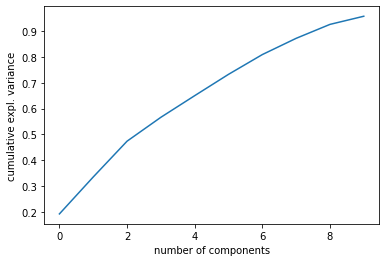

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative expl. variance")

In [59]:
X_train.shape

(1947057, 15)

In [60]:
pca = PCA(n_components=10)

In [61]:
scaler = StandardScaler()

In [62]:
clf = LogisticRegression(random_state=0, 
                         class_weight="balanced",
                           max_iter=1000,
#                          n_jobs=-1,
#                          C=0.0001,
                        )

# clf = RandomForestClassifier(random_state=0,
#                     class_weight="balanced",
#                     max_depth=2,
#                     n_jobs=-1,
#                 )

# clf = HistGradientBoostingClassifier(random_state=0,
#                                  max_iter=100000, 
#                                  max_depth=2,
# #                                  learning_rate=1.0,
#                                 validation_fraction=None,
#                                  verbose=1,
#                                 )

# clf = LinearSVC(random_state=0,
#                class_weight="balanced",
#                )

# clf = SVC(random_state=0,
#          class_weight="balanced",
#          )

In [63]:
len(X_train)

1947057

In [64]:
clf = Pipeline([
    ('scaler', scaler),
#     ('pca' , pca),
    ('clf', clf),
])

In [65]:
# np.logspace(-2, 2, 5)

In [66]:
# train_indices = [[1,3,5,7,9],[2,4,6,8]]
# test_indices = [[2,4,6,8],[1,3,5,7,9]]

In [67]:
# a = zip(train_indices, test_indices)

In [68]:
# for i, y in a:
#     print(i, y)

In [69]:
# def cv_gen():
#     for i in range(3):
#         yield i, i*2

In [70]:
param_grid = {
#     "clf__C": np.logspace(-15, 0, 5),
#       "clf__max_depth": [2, 3, 4],
}
clf = GridSearchCV(
    clf, 
    param_grid,
    scoring=["accuracy", "balanced_accuracy"],
    refit="balanced_accuracy",
    n_jobs=-1,
#     cv=a,
    verbose=3,
)

In [71]:
# sample_weight
# sample_weight = 3 * (len(y_train) - np.sum(y_train)) / np.sum(y_train)

In [72]:
s_time = time.time()
clf.fit(X_train, y_train,
#        clf__sample_weight=sample_weight
       )
e_time = time.time()
print("Time to fit: ", (e_time - s_time), "seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time to fit:  30.57706093788147 seconds


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [74]:
y_trivial = np.zeros_like(y_val)

In [75]:
pd.value_counts(y_val)

 0    145614
-1     23035
 1     22611
dtype: int64

In [76]:
np.mean(y_val)

-0.0022168775488863326

##### Trivial prediction

In [77]:
# TRIVIAL prediction
accuracy_score(y_val, y_trivial)

0.761340583498902

In [78]:
# TRIVIAL prediction
balanced_accuracy_score(y_val, y_trivial)

0.3333333333333333

#### Classifier prediction

In [79]:
# CLASSIFIER
y_pred = clf.predict(X_val)

In [80]:
# CLASSIFIER
accuracy_score(y_val, y_pred)

0.6906253267802991

In [81]:
# 0.54

In [82]:
# CLASSIFIER
balanced_accuracy_score(y_val, y_pred)

0.45981574987697105

In [83]:
# LR 0.5240759984109695
#RF 0.5263639414267005

In [84]:
# 0.52

In [85]:
pd.value_counts(y_pred)

 0    142842
-1     36158
 1     12260
dtype: int64

In [86]:
np.mean(y_pred)

-0.12495032939454147

In [87]:
np.sum(y_pred) / len(y_pred)

-0.12495032939454147

In [88]:
from sklearn.dummy import DummyClassifier

In [105]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [106]:
y_dummy = dummy_clf.predict(X_val)

In [107]:
accuracy_score(y_val, y_dummy)

0.5204642894489176

In [108]:
balanced_accuracy_score(y_val, y_dummy)

0.3335927754869628

In [93]:
clf.cv_results_


{'mean_fit_time': array([16.39938798]),
 'std_fit_time': array([0.60498907]),
 'mean_score_time': array([0.49178634]),
 'std_score_time': array([0.06050864]),
 'params': [{}],
 'split0_test_accuracy': array([0.3674309]),
 'split1_test_accuracy': array([0.4660976]),
 'split2_test_accuracy': array([0.4193898]),
 'split3_test_accuracy': array([0.62343642]),
 'split4_test_accuracy': array([0.64714145]),
 'mean_test_accuracy': array([0.50469923]),
 'std_test_accuracy': array([0.11135411]),
 'rank_test_accuracy': array([1]),
 'split0_test_balanced_accuracy': array([0.42621322]),
 'split1_test_balanced_accuracy': array([0.44552566]),
 'split2_test_balanced_accuracy': array([0.3595471]),
 'split3_test_balanced_accuracy': array([0.5203737]),
 'split4_test_balanced_accuracy': array([0.40010336]),
 'mean_test_balanced_accuracy': array([0.43035261]),
 'std_test_balanced_accuracy': array([0.05344079]),
 'rank_test_balanced_accuracy': array([1])}

In [94]:
clf.best_params_

{}